In [741]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [742]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and cleaning data

In [743]:
df = pd.read_csv('/content/drive/MyDrive/UC3M/ESTADÍSTICA_Y_EMPRESA/4 - GVSU/Winter/CIS 331/FINAL PROJECT/dataset.csv')
df

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Gini index,SI.POV.GINI,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,3521418060,2813571754,3825701439,4520946819,5224896719,6203256539,...,19907329778,20146416758,20497128556,19134221645,18116572395,18753456498,18053222687,18799444490,19955929052,14259995441
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,-9.43197407,28.60000117,8.832277803,1.414117993,11.22971483,...,12.75228709,5.600744659,2.724543362,1.451314661,2.260314203,2.647003203,1.189228129,3.911603416,-2.351100672,-20.73883937
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,174.9309914,138.7068217,178.9540884,198.8711157,221.7636539,254.1842491,...,651.4171345,637.0870991,625.0549418,565.5697304,522.0822156,525.4697709,491.3372214,496.6025043,510.7870634,356.4962141
4,Afghanistan,AFG,GNI (current US$),NY.GNP.MKTP.CD,3411145674,2824372441,3886746600,4582016676,5291642598,6280264337,...,19961261595,20209353658,20559672325,19249499439,18350475875,18961769787,18294513958,19080662011,20105156769,14346089108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,11892055,11971901,12087653,12232323,12365896,12483432,...,13817887,14013808,14207359,14399013,14600294,14812482,15034452,15271368,15526888,15797210
5421,Zimbabwe,ZWE,Urban population,SP.URB.TOTL,4014520,4090799,4180515,4217583,4240760,4258099,...,4536965,4576069,4617960,4663120,4715311,4775100,4842447,4918908,5006179,5102973
5422,Zimbabwe,ZWE,Income share held by highest 10%,SI.DST.10TH.10,..,..,..,..,..,..,...,..,..,..,..,..,34.8,..,..,..,..
5423,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.684,5.318,5.007,4.735,4.39,4.622,...,5.061,4.943,4.774,5.377,5.886,6.344,6.793,7.373,8.621,9.54


The dataset has a messy format to work with. All the variables are in a column called Series Name. The rest of the columns consist in Country Name, Country Code, Series Code and one column for each year, with a messy title format.

The first thing I am going to do is change the titles of every year column to YYYY

In [744]:
# Extract year values from column names (e.g., "2000 [YR2000]" → "2000")
df.columns = [col.split(" ")[0] if "YR" in col else col for col in df.columns]
df.head()

,Country Name,Country Code,Series Name,Series Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Gini index,SI.POV.GINI,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,3521418060,2813571754,3825701439,4520946819,5224896719,6203256539,...,19907329778,20146416758,20497128556,19134221645,18116572395,18753456498,18053222687,18799444490,19955929052,14259995441
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,-9.43197407,28.60000117,8.832277803,1.414117993,11.22971483,...,12.75228709,5.600744659,2.724543362,1.451314661,2.260314203,2.647003203,1.189228129,3.911603416,-2.351100672,-20.73883937
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,174.9309914,138.7068217,178.9540884,198.8711157,221.7636539,254.1842491,...,651.4171345,637.0870991,625.0549418,565.5697304,522.0822156,525.4697709,491.3372214,496.6025043,510.7870634,356.4962141
4,Afghanistan,AFG,GNI (current US$),NY.GNP.MKTP.CD,3411145674,2824372441,3886746600,4582016676,5291642598,6280264337,...,19961261595,20209353658,20559672325,19249499439,18350475875,18961769787,18294513958,19080662011,20105156769,14346089108


Before changing the format of the data, let's check the missing values for every yer. If any years have more than 50% missing values we will drop them. It is possible that the earlier or later years have less data points.

Since the missing values instead of being NaN have a given value of "..", we need to change them to NaN and the years to numeric.

In [745]:
# Replace ".." with NaN
df.replace("..", np.nan, inplace=True)

# Convert all year columns to numeric
year_columns = df.columns[4:]  # Adjust index if needed
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors="coerce")

In [746]:
#Let's check if it worked
df.head()

,Country Name,Country Code,Series Name,Series Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,3.521418e+09,2.813572e+09,3.825701e+09,4.520947e+09,5.224897e+09,6.203257e+09,...,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-9.431974e+00,2.860000e+01,8.832278e+00,1.414118e+00,1.122971e+01,...,1.275229e+01,5.600745e+00,2.724543e+00,1.451315e+00,2.260314e+00,2.647003e+00,1.189228e+00,3.911603e+00,-2.351101e+00,-2.073884e+01
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1.749310e+02,1.387068e+02,1.789541e+02,1.988711e+02,2.217637e+02,2.541842e+02,...,6.514171e+02,6.370871e+02,6.250549e+02,5.655697e+02,5.220822e+02,5.254698e+02,4.913372e+02,4.966025e+02,5.107871e+02,3.564962e+02
4,Afghanistan,AFG,GNI (current US$),NY.GNP.MKTP.CD,3.411146e+09,2.824372e+09,3.886747e+09,4.582017e+09,5.291643e+09,6.280264e+09,...,1.996126e+10,2.020935e+10,2.055967e+10,1.924950e+10,1.835048e+10,1.896177e+10,1.829451e+10,1.908066e+10,2.010516e+10,1.434609e+10


Now we can check for missing values

In [747]:
# Count missing values for each year
missing_per_year = df[year_columns].isnull().sum()

# Calculate percentage of missing values per year
missing_percentage_per_year = (missing_per_year / len(df)) * 100

# Create a DataFrame to display missing values per year
missing_year_summary = pd.DataFrame({
    'Missing Values': missing_per_year,
    'Percentage': missing_percentage_per_year
})

# Display missing values per year
print(missing_year_summary)

      Missing Values  Percentage
2000            1452   26.764977
2001            1519   28.000000
2002            1445   26.635945
2003            1483   27.336406
2004            1368   25.216590
2005            1369   25.235023
2006            1403   25.861751
2007            1382   25.474654
2008            1324   24.405530
2009            1296   23.889401
2010            1232   22.709677
2011            1214   22.377880
2012            1208   22.267281
2013            1247   22.986175
2014            1174   21.640553
2015            1152   21.235023
2016            1174   21.640553
2017            1185   21.843318
2018            1262   23.262673
2019            1458   26.875576
2020            1503   27.705069
2021            1492   27.502304


There are no years with significantly higher values than the rest. Earlier and later years have more missing values, but not significant

Now, let's put the years in the same column and create a new value column. This value column will include the value for every Country, year and indicator combination.

In [748]:
# Reshape dataset from wide to long format

df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    var_name="Year",
    value_name="Value"
)
df_long.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,Afghanistan,AFG,Gini index,SI.POV.GINI,2000,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2000,3.521418e+09
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2000,NaN
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2000,1.749310e+02
4,Afghanistan,AFG,GNI (current US$),NY.GNP.MKTP.CD,2000,3.411146e+09


Now let's convert the years to integers to better use them later.

In [749]:
df_long["Year"] = df_long["Year"].astype(int)

We don't need the Series Code column, since it is duplicate information. Let's drop it.

In [750]:
df_long.drop(columns=["Series Code"], inplace=True)

In [751]:
df_long.head()

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Gini index,2000,NaN
1,Afghanistan,AFG,GDP (current US$),2000,3.521418e+09
2,Afghanistan,AFG,GDP growth (annual %),2000,NaN
3,Afghanistan,AFG,GDP per capita (current US$),2000,1.749310e+02
4,Afghanistan,AFG,GNI (current US$),2000,3.411146e+09


Now let's transform the dataset again to have each indicator as one column, instead of all of them in the same one.

In [752]:
data = df_long.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

In [753]:
data.head()

Series Name,Country Name,Country Code,Year,Current health expenditure (% of GDP),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,People using at least basic drinking water services (% of population),"Physicians (per 1,000 people)","Population, total","School enrollment, primary (% gross)","School enrollment, primary (% net)","School enrollment, secondary (% gross)","School enrollment, secondary (% net)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population
0,Afghanistan,AFG,2000,NaN,NaN,3.521418e+09,NaN,174.930991,3.411146e+09,NaN,...,27.441856,NaN,20130327.0,22.162991,NaN,NaN,NaN,7.935,10.235,4444374.0
1,Afghanistan,AFG,2001,NaN,NaN,2.813572e+09,-9.431974,138.706822,2.824372e+09,NaN,...,27.473580,0.208,20284307.0,22.908590,NaN,14.47151,NaN,7.953,10.254,4496828.0
2,Afghanistan,AFG,2002,9.443391,NaN,3.825701e+09,28.600001,178.954088,3.886747e+09,180.0,...,29.674863,NaN,21378117.0,75.959747,NaN,NaN,NaN,7.930,10.234,4758983.0
3,Afghanistan,AFG,2003,8.941258,NaN,4.520947e+09,8.832278,198.871116,4.582017e+09,190.0,...,31.875589,NaN,22733049.0,96.553680,NaN,14.07805,NaN,7.880,10.189,5081518.0
4,Afghanistan,AFG,2004,9.808474,NaN,5.224897e+09,1.414118,221.763654,5.291643e+09,210.0,...,34.094431,NaN,23560654.0,106.252663,NaN,19.26314,NaN,7.899,10.200,5301147.0


In [754]:
# Remove the column index name
data.columns.name = None
data.head()

,Country Name,Country Code,Year,Current health expenditure (% of GDP),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,People using at least basic drinking water services (% of population),"Physicians (per 1,000 people)","Population, total","School enrollment, primary (% gross)","School enrollment, primary (% net)","School enrollment, secondary (% gross)","School enrollment, secondary (% net)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population
0,Afghanistan,AFG,2000,NaN,NaN,3.521418e+09,NaN,174.930991,3.411146e+09,NaN,...,27.441856,NaN,20130327.0,22.162991,NaN,NaN,NaN,7.935,10.235,4444374.0
1,Afghanistan,AFG,2001,NaN,NaN,2.813572e+09,-9.431974,138.706822,2.824372e+09,NaN,...,27.473580,0.208,20284307.0,22.908590,NaN,14.47151,NaN,7.953,10.254,4496828.0
2,Afghanistan,AFG,2002,9.443391,NaN,3.825701e+09,28.600001,178.954088,3.886747e+09,180.0,...,29.674863,NaN,21378117.0,75.959747,NaN,NaN,NaN,7.930,10.234,4758983.0
3,Afghanistan,AFG,2003,8.941258,NaN,4.520947e+09,8.832278,198.871116,4.582017e+09,190.0,...,31.875589,NaN,22733049.0,96.553680,NaN,14.07805,NaN,7.880,10.189,5081518.0
4,Afghanistan,AFG,2004,9.808474,NaN,5.224897e+09,1.414118,221.763654,5.291643e+09,210.0,...,34.094431,NaN,23560654.0,106.252663,NaN,19.26314,NaN,7.899,10.200,5301147.0


Now, the dataset has a better format, which is easier to work with and analize.

Since some of the objectives are regional comparisons, let's add the region for each country. I am going to use the metadata provided on the website, since it has the region for every country.

In [755]:
#Let's import it
metadata = pd.read_csv('/content/drive/MyDrive/UC3M/ESTADÍSTICA_Y_EMPRESA/4 - GVSU/Winter/CIS 331/FINAL PROJECT/Country_Metadata.csv')
metadata.head()

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",The reporting period for national accounts dat...,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2020 (expected),"Demographic and Health Survey, 2017/18",NaN,...,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2018.0,AL,AL,Albania,Albania
2,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,IBRD,NaN,Algerian dinar,2020 (expected),"Multiple Indicator Cluster Survey, 2018/19",NaN,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2011",NaN,NaN,2010.0,2017.0,DZ,DZ,Algeria,Algeria
3,ASM,American Samoa,High income,East Asia & Pacific,NaN,NaN,U.S. dollar,2020 (expected),NaN,NaN,...,NaN,NaN,Yes,2008,NaN,NaN,AS,AS,American Samoa,American Samoa
4,AND,Principality of Andorra,High income,Europe & Central Asia,NaN,NaN,Euro,2011. Population figures compiled from adminis...,NaN,NaN,...,NaN,NaN,Yes,NaN,NaN,2018.0,AD,AD,Andorra,Andorra


In [756]:
#Let's merge to our Dataset the column Region by Country Code
data = data.merge(metadata[["Code", "Region"]],
                  left_on="Country Code", right_on="Code", how="left")

#Drop the redundant "Code" column after merging
data.drop(columns=["Code"], inplace=True)

#Verify the merge: Check if Region was added correctly
print(data[["Country Name", "Country Code","Region"]].head())

#Check if there are any missing values in the merged column
print(data["Region"].isnull().sum())


  Country Name Country Code      Region
0  Afghanistan          AFG  South Asia
1  Afghanistan          AFG  South Asia
2  Afghanistan          AFG  South Asia
3  Afghanistan          AFG  South Asia
4  Afghanistan          AFG  South Asia
0


## Exploring data



In [757]:
#First, let's display the number of rows and columns
rows, columns = data.shape
print("Number of Rows:", rows)
print("Number of Columns:",columns)

Number of Rows: 4774
Number of Columns: 29


In [758]:
#Now, let's display de metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774 entries, 0 to 4773
Data columns (total 29 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Country Name                                                                          4774 non-null   object 
 1   Country Code                                                                          4774 non-null   object 
 2   Year                                                                                  4774 non-null   int64  
 3   Current health expenditure (% of GDP)                                                 4090 non-null   float64
 4   Exports of goods and services (% of GDP)                                              3949 non-null   float64
 5   GDP (current US$)                                                                  

We have 4774 entries, each one being a combination of each country for every year. We have 27 columns: Country Name, Country Code, Year and the 24 indicators.

In [759]:
#Let's check distributions of the dataset
data.describe()

,Year,Current health expenditure (% of GDP),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",Gini index,"Government expenditure on education, total (% of GDP)",...,People using at least basic drinking water services (% of population),"Physicians (per 1,000 people)","Population, total","School enrollment, primary (% gross)","School enrollment, primary (% net)","School enrollment, secondary (% gross)","School enrollment, secondary (% net)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population
count,4774.000000,4090.000000,3949.000000,4.622000e+03,4544.000000,4625.000000,4.388000e+03,4319.000000,1593.000000,3199.000000,...,4583.000000,2575.000000,4.774000e+03,3731.000000,2419.000000,3196.000000,1891.000000,4114.000000,4114.000000,4.730000e+03
mean,2010.500000,6.231224,42.040291,3.077539e+11,3.297669,15529.680023,3.228347e+11,12719.041445,36.955556,4.431859,...,86.174651,2.042819,3.237780e+07,102.117771,88.889504,82.144109,71.172054,8.160817,17.468282,1.690709e+07
std,6.344953,2.834922,31.825609,1.390973e+12,5.785129,24099.308475,1.436811e+12,18510.108362,8.291305,1.893106,...,17.994825,1.569762,1.289683e+08,13.789935,12.178121,28.986228,24.088167,6.055931,12.789391,5.928311e+07
min,2000.000000,1.107200,2.249870,1.396473e+07,-54.336155,109.593814,2.338878e+07,110.000000,23.200000,0.358479,...,18.682303,0.011000,9.544000e+03,8.447979,26.827810,5.460224,3.279680,0.100000,0.295000,4.392000e+03
25%,2005.000000,4.172693,22.775241,4.143654e+09,1.141878,1461.389992,4.568206e+09,1355.000000,30.800000,3.135635,...,79.417208,0.572000,7.096710e+05,97.403435,86.869195,66.237623,57.344680,3.802250,7.936250,3.905275e+05
50%,2010.500000,5.650000,35.054905,1.711589e+10,3.503432,5086.027401,1.854706e+10,4430.000000,35.100000,4.245400,...,94.925465,2.030000,5.683450e+06,101.950111,93.134910,88.829311,80.138010,6.362500,14.292000,3.088928e+06
75%,2016.000000,7.938458,52.539242,1.120395e+11,5.909599,20130.257150,1.273110e+11,15885.000000,42.000000,5.432175,...,99.318598,3.210000,2.057872e+07,108.294067,96.536355,101.204725,89.682470,11.045500,23.866000,9.807760e+06
max,2021.000000,24.283052,433.836004,2.368120e+13,86.826748,223823.364000,2.383220e+13,121890.000000,64.800000,15.863470,...,100.000000,9.429000,1.414204e+09,214.671173,99.955870,194.460022,99.911640,37.320000,82.409000,8.828945e+08


## Handling Missing Values

In [760]:
missing_values = data.isna().sum()

In [761]:
#Let's calculate the percentages of missing values
missing_percentage = (missing_values / len(data)) * 100
missing_percentage

,0
Country Name,0.000000
Country Code,0.000000
Year,0.000000
Current health expenditure (% of GDP),14.327608
Exports of goods and services (% of GDP),17.281106
GDP (current US$),3.183913
GDP growth (annual %),4.817763
GDP per capita (current US$),3.121072
GNI (current US$),8.085463
"GNI per capita, Atlas method (current US$)",9.530792


In [762]:
# Create a summary of missing values to display number and percentage together
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]  # Show only columns with missing values

# Display missing values summary
print(missing_summary)

                                                    Missing Values  Percentage
Current health expenditure (% of GDP)                          684   14.327608
Exports of goods and services (% of GDP)                       825   17.281106
GDP (current US$)                                              152    3.183913
GDP growth (annual %)                                          230    4.817763
GDP per capita (current US$)                                   149    3.121072
GNI (current US$)                                              386    8.085463
GNI per capita, Atlas method (current US$)                     455    9.530792
Gini index                                                    3181   66.631755
Government expenditure on education, total (% o...            1575   32.991202
Government expenditure on education, total (% o...            1858   38.919145
Income share held by highest 10%                              3182   66.652702
Life expectancy at birth, total (years)             

In [763]:
# Count non-missing Gini Index values per country
gini_available = data.groupby("Country Name")["Gini index"].count()

# Check how many countries have at least some Gini data
print(f"Countries with Gini Index available: {sum(gini_available > 0)} out of {len(gini_available)}")


Countries with Gini Index available: 164 out of 217


We can clearly see how some indicators have more than 35% missingness. This is a lot, so we are going to drop them.

In [764]:
# Identify columns to drop (more than 50% missing, but keep "Gini index")
cols_to_drop = missing_percentage[
    (missing_percentage > 35) & (missing_percentage.index != "Gini index")
].index

# Drop the identified columns
data_cleaned = data.drop(columns=cols_to_drop)

# Display dropped columns and the updated dataset shape
print(f"Dropped columns: {list(cols_to_drop)}")
print(f"Updated dataset shape: {data_cleaned.shape}")

Dropped columns: ['Government expenditure on education, total (% of government expenditure)', 'Income share held by highest 10%', 'Literacy rate, adult total (% of people ages 15 and above)', 'Physicians (per 1,000 people)', 'School enrollment, primary (% net)', 'School enrollment, secondary (% net)']
Updated dataset shape: (4774, 23)


Now let's study how many country-year combinations have more than 50% missingness. If the value is not to high, we can drop these columns to keep the noise in our dataset low.

In [765]:
# Define the threshold: 50% of total columns
row_threshold = 0.5 * data_cleaned.shape[1]
rows_to_drop = data_cleaned.isnull().sum(axis=1) > row_threshold
print(f"Number of rows with more than 50% missing values: {rows_to_drop.sum()}")

#Sample of these rows
data_cleaned[rows_to_drop]


Number of rows with more than 50% missing values: 143


,Country Name,Country Code,Year,Current health expenditure (% of GDP),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)",...,"Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),"Population, total","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Region
66,American Samoa,ASM,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,94.932290,56855.0,NaN,NaN,NaN,NaN,50366.0,East Asia & Pacific
67,American Samoa,ASM,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.185965,57053.0,NaN,NaN,NaN,NaN,50487.0,East Asia & Pacific
68,American Samoa,ASM,2002,NaN,101.171875,512000000.0,NaN,8972.696365,NaN,NaN,...,NaN,NaN,95.439639,57062.0,NaN,NaN,NaN,NaN,50439.0,East Asia & Pacific
69,American Samoa,ASM,2003,NaN,97.900763,524000000.0,0.965517,9197.661968,NaN,NaN,...,NaN,NaN,95.693313,56971.0,NaN,NaN,NaN,NaN,50304.0,East Asia & Pacific
70,American Samoa,ASM,2004,NaN,90.373281,509000000.0,0.409836,8958.428667,NaN,NaN,...,NaN,NaN,95.946987,56818.0,NaN,NaN,NaN,NaN,50112.0,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,Turks and Caicos Islands,TCA,2007,NaN,NaN,773489700.0,NaN,29443.840880,NaN,NaN,...,5.6,8.2,NaN,26270.0,NaN,NaN,NaN,NaN,23327.0,Latin America & Caribbean
4408,Turks and Caicos Islands,TCA,2008,NaN,NaN,862683600.0,NaN,31453.808290,NaN,NaN,...,5.5,7.9,NaN,27427.0,NaN,NaN,NaN,NaN,24491.0,Latin America & Caribbean
4410,Turks and Caicos Islands,TCA,2010,NaN,NaN,686787800.0,NaN,23093.843100,NaN,NaN,...,5.2,7.6,NaN,29739.0,NaN,NaN,NaN,NaN,26833.0,Latin America & Caribbean
4664,Virgin Islands (U.S.),VIR,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,98.718354,108642.0,NaN,NaN,10.546,21.571,100587.0,Latin America & Caribbean


Only 143 country-year combinations have more than 50% missing values, about a 0.03% of the data. I will drop these rows before using any imputation techniques so noise isn't increased

In [766]:
# Define threshold: Drop rows where more than 50% of values are missing
row_threshold = 0.5 * data_cleaned.shape[1]

# Drop rows where missing values exceed the threshold
data_cleaned = data_cleaned.dropna(thresh=row_threshold)

# Print the updated dataset shape
print(f"Updated dataset shape after dropping rows: {data_cleaned.shape}")


Updated dataset shape after dropping rows: (4631, 23)


Let's check missingness of the cleaned dataset

In [767]:
# Recalculate missing values for remaining columns
missing_values = data_cleaned.isna().sum()

# Calculate percentage of missing values per column
missing_percentage = (missing_values / len(data_cleaned)) * 100

# Create a summary of missing values (only showing columns with missing values)
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter only columns that still have missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Display missing values summary
print("Missing values after dropping rows:")
print(missing_summary)


Missing values after dropping rows:
                                                    Missing Values  Percentage
Current health expenditure (% of GDP)                          541   11.682142
Exports of goods and services (% of GDP)                       721   15.568992
GDP (current US$)                                               71    1.533146
GDP growth (annual %)                                          141    3.044699
GDP per capita (current US$)                                    68    1.468365
GNI (current US$)                                              247    5.333621
GNI per capita, Atlas method (current US$)                     314    6.780393
Gini index                                                    3041   65.666163
Government expenditure on education, total (% o...            1432   30.922047
Life expectancy at birth, total (years)                        102    2.202548
Mortality rate, infant (per 1,000 live births)                 340    7.341827
Mortality rate, 

We are going to use median imputation to predict the missing values, using regional medians for each variable.

In [768]:
# Group data by 'Region' and calculate medians for all numeric columns
regional_medians = data_cleaned.groupby('Region').median(numeric_only=True)

# Remove 'Gini index' from regional_medians if it exists
regional_medians = regional_medians.drop(columns=['Gini index'], errors='ignore')

# Set 'Region' as the index for easier imputation
data_cleaned = data_cleaned.set_index('Region')

# Select columns to impute (all numeric columns except 'Gini index')
cols_to_impute = data_cleaned.select_dtypes(include=np.number).columns.difference(['Gini index'])

#Also drop Gini index
data_cleaned = data_cleaned.drop(columns=['Gini index'], errors='ignore')

# Update the selected columns with regional medians, matching by index ('Region')
data_cleaned.loc[:, cols_to_impute] = data_cleaned.loc[:, cols_to_impute].fillna(regional_medians, axis=0)

# Reset the index to the original structure
data_cleaned = data_cleaned.reset_index()


In [769]:
regional_medians

,Year,Current health expenditure (% of GDP),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),GDP per capita (current US$),GNI (current US$),"GNI per capita, Atlas method (current US$)","Government expenditure on education, total (% of GDP)","Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),"Population, total","School enrollment, primary (% gross)","School enrollment, secondary (% gross)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population
Region,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,2011.0,4.801075,35.557440,9.659152e+09,3.499497,3943.799439,1.134340e+10,3650.0,3.938955,71.216000,20.55,23.75,95.805034,2786317.0,103.001533,84.454836,3.8145,9.7120,1021715.0
Europe & Central Asia,2011.0,7.410000,42.542738,5.100520e+10,3.107067,18635.510490,5.532550e+10,14200.0,4.793835,76.895122,4.60,5.50,99.611008,5451592.0,100.800667,100.735901,7.5950,17.6160,3541317.0
Latin America & Caribbean,2011.0,5.797010,32.485695,1.351644e+10,2.783161,7083.456818,1.400520e+10,6510.0,4.258525,73.568000,16.00,18.20,95.330046,3371520.5,106.889839,90.200783,7.5520,17.1870,2822188.5
Middle East & North Africa,2010.5,4.734573,39.730035,5.411174e+10,3.730197,4924.306864,5.208038e+10,5460.0,4.923611,74.399500,15.05,17.60,95.541676,7435936.0,100.903629,88.121063,9.6935,22.0320,6268498.0
North America,2011.0,12.762572,30.947372,1.617340e+12,2.117830,52223.858840,1.709475e+12,48945.0,4.887950,79.871000,5.35,6.25,99.236353,34713395.0,99.673378,98.861134,6.6210,12.6330,28165407.0
South Asia,2010.5,3.815000,17.859125,2.446495e+10,5.571788,1166.706804,2.477441e+10,1145.0,3.485837,67.429500,38.35,47.40,88.614782,27500508.0,100.943069,54.494850,5.9100,14.9985,5358702.0
Sub-Saharan Africa,2011.0,4.668657,24.872604,8.797764e+09,4.353500,854.088267,8.438652e+09,810.0,3.419494,58.831000,56.45,85.10,60.868199,10847941.0,99.895388,39.523008,5.0930,9.0105,2884710.0


In [770]:
print(data_cleaned.isna().sum())

Region                                                                                  0
Country Name                                                                            0
Country Code                                                                            0
Year                                                                                    0
Current health expenditure (% of GDP)                                                   0
Exports of goods and services (% of GDP)                                                0
GDP (current US$)                                                                       0
GDP growth (annual %)                                                                   0
GDP per capita (current US$)                                                            0
GNI (current US$)                                                                       0
GNI per capita, Atlas method (current US$)                                              0
Government

As we can see, there are only missing values for the Gini index.

# **EDA (Exploratory Data Analysis)**

Let's change the variables name to make them shorter and easier to read in visualizations

In [771]:
# Rename columns for better readability
data_cleaned = data_cleaned.rename(columns={
    "Current health expenditure (% of GDP)": "Health Expenditure (% of GDP)",
    "Exports of goods and services (% of GDP)": "Exports (% of GDP)",
    "GDP growth (annual %)": "GDP Growth (%)",
    "GDP per capita (current US$)": "GDP per Capita (US$)",
    "GNI per capita, Atlas method (current US$)": "GNI per Capita (US$)",
    "Government expenditure on education, total (% of GDP)": "Education Expenditure (% of GDP)",
    "Life expectancy at birth, total (years)": "Life Expectancy (Years)",
    "Mortality rate, infant (per 1,000 live births)": "Infant Mortality Rate (per 1,000)",
    "People using at least basic drinking water services (% of population)": "Basic Water Access (%)",
    "Population, total": "Total Population",
    "School enrollment, primary (% gross)": "Primary School Enrollment (%)",
    "School enrollment, secondary (% gross)": "Secondary School Enrollment (%)",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": "Unemployment Rate (%)",
    "Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)": "Youth Unemployment Rate (%)",
    "Urban population": "Urban Population"
})

# Confirm renaming worked
print("Updated column names:", list(data_cleaned.columns))


Updated column names: ['Region', 'Country Name', 'Country Code', 'Year', 'Health Expenditure (% of GDP)', 'Exports (% of GDP)', 'GDP (current US$)', 'GDP Growth (%)', 'GDP per Capita (US$)', 'GNI (current US$)', 'GNI per Capita (US$)', 'Education Expenditure (% of GDP)', 'Life Expectancy (Years)', 'Infant Mortality Rate (per 1,000)', 'Mortality rate, under-5 (per 1,000 live births)', 'Basic Water Access (%)', 'Total Population', 'Primary School Enrollment (%)', 'Secondary School Enrollment (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)', 'Urban Population']


## Coefficients Matrix

Let's check relationships between variables with the coefficients matrix in a heatmap

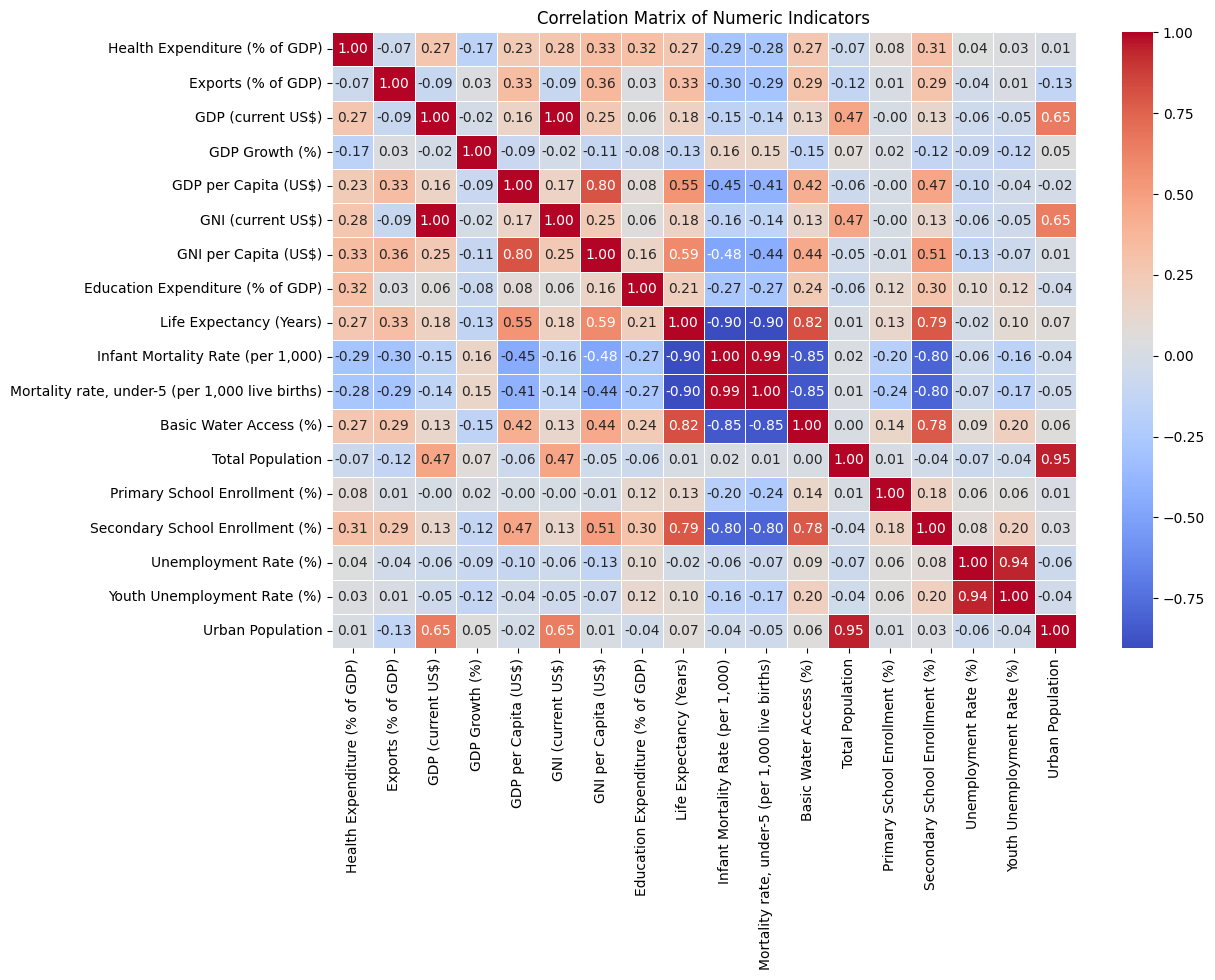

In [772]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=["float64"])

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Indicators")
plt.show()

Let's drop hihgly correlated variables

In [773]:
# Define the variables to drop
features_to_drop = ["GDP (current US$)", "GNI (current US$)", "Mortality rate, under-5 (per 1,000 live births)"]

# Drop the selected variables
data_cleaned = data_cleaned.drop(columns=features_to_drop)

# Check the updated dataset
print("Updated dataset columns after removing selected variables:")
print(data_cleaned.columns)

Updated dataset columns after removing selected variables:
Index(['Region', 'Country Name', 'Country Code', 'Year',
       'Health Expenditure (% of GDP)', 'Exports (% of GDP)', 'GDP Growth (%)',
       'GDP per Capita (US$)', 'GNI per Capita (US$)',
       'Education Expenditure (% of GDP)', 'Life Expectancy (Years)',
       'Infant Mortality Rate (per 1,000)', 'Basic Water Access (%)',
       'Total Population', 'Primary School Enrollment (%)',
       'Secondary School Enrollment (%)', 'Unemployment Rate (%)',
       'Youth Unemployment Rate (%)', 'Urban Population'],
      dtype='object')


## Univariate EDA

Before continuing with the EDA, let's create a new variable that will later be used, "Income Group"

In [774]:
# Function
def classify_income_group(gni_per_capita):
    if gni_per_capita < 1000:
        return "Low Income"
    elif 1000 <= gni_per_capita < 4000:
        return "Lower-Middle Income"
    elif 4000 <= gni_per_capita < 12000:
        return "Upper-Middle Income"
    else:
        return "High Income"

# Apply the function to create a new column "Income Group"
data_cleaned["Income Group"] = data_cleaned["GNI per Capita (US$)"].apply(classify_income_group)


In [775]:
# Check distribution of income groups
print("Income Group Distribution:")
print(data_cleaned["Income Group"].value_counts())

Income Group Distribution:
Income Group
High Income            1391
Lower-Middle Income    1292
Upper-Middle Income    1091
Low Income              857
Name: count, dtype: int64


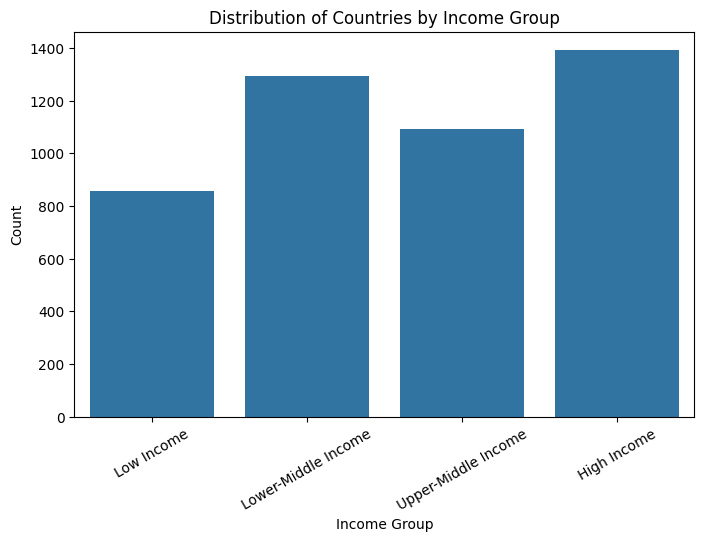

In [776]:

plt.figure(figsize=(8, 5))
sns.countplot(x=data_cleaned["Income Group"], order=["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"])
plt.title("Distribution of Countries by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()



## Univariate EDA on Numeric Variables

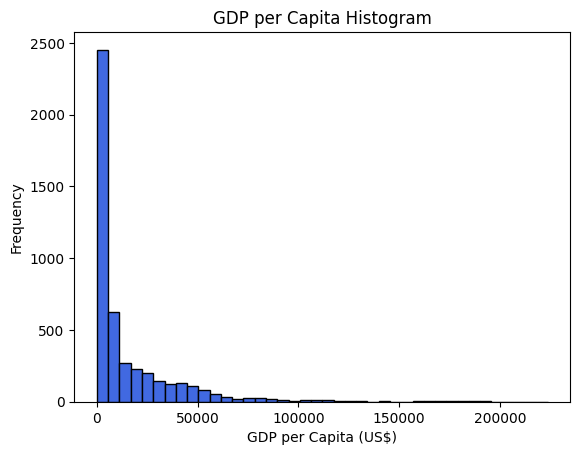

In [777]:
#GDP per Capita
plt.hist(data_cleaned['GDP per Capita (US$)'], bins=40, color='royalblue', edgecolor='black')
plt.title('GDP per Capita Histogram')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Frequency')
plt.show()


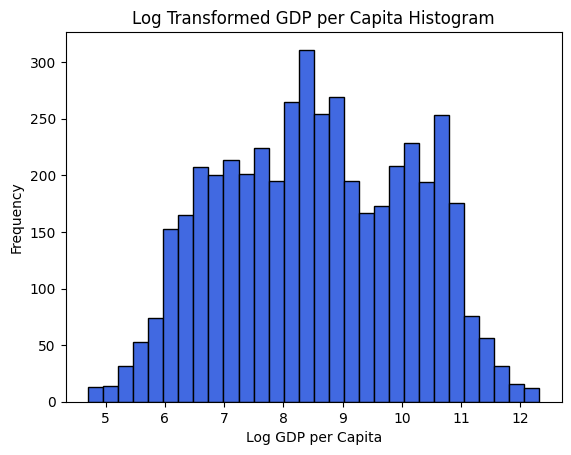

In [778]:
# Apply log transformation
data_cleaned["Log GDP per Capita"] = np.log1p(data_cleaned["GDP per Capita (US$)"])

# Plot transformed histogram
plt.hist(data_cleaned["Log GDP per Capita"], bins=30, color="royalblue", edgecolor="black")
plt.title("Log Transformed GDP per Capita Histogram")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Frequency")
plt.show()

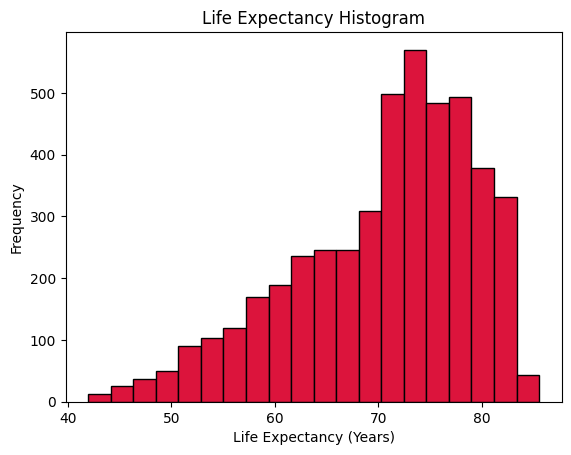

In [779]:
#Life Expectancy
plt.hist(data_cleaned['Life Expectancy (Years)'], bins=20, color='crimson', edgecolor='black')
plt.title('Life Expectancy Histogram')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.show()


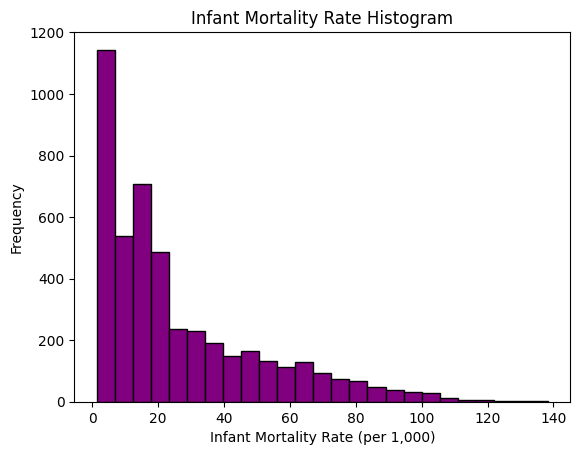

In [780]:
#Infant Mortality Rate (per 1,000)
plt.hist(data_cleaned['Infant Mortality Rate (per 1,000)'], bins=25, color='purple', edgecolor='black')
plt.title('Infant Mortality Rate Histogram')
plt.xlabel('Infant Mortality Rate (per 1,000)')
plt.ylabel('Frequency')
plt.show()


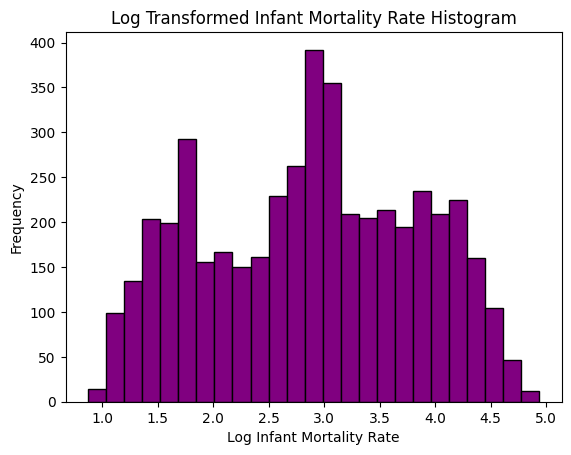

In [781]:
# Apply log transformation
data_cleaned["Log Infant Mortality Rate"] = np.log1p(data_cleaned["Infant Mortality Rate (per 1,000)"])

# Plot transformed histogram
plt.hist(data_cleaned["Log Infant Mortality Rate"], bins=25, color="purple", edgecolor="black")
plt.title("Log Transformed Infant Mortality Rate Histogram")
plt.xlabel("Log Infant Mortality Rate")
plt.ylabel("Frequency")
plt.show()


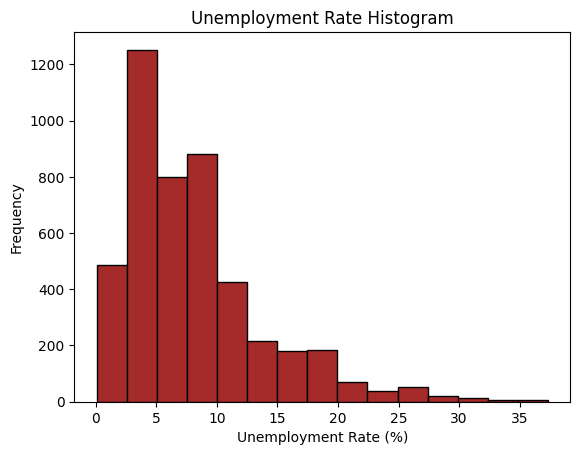

In [782]:
#Unemployment Rate (%)
plt.hist(data_cleaned['Unemployment Rate (%)'], bins=15, color='brown', edgecolor='black')
plt.title('Unemployment Rate Histogram')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


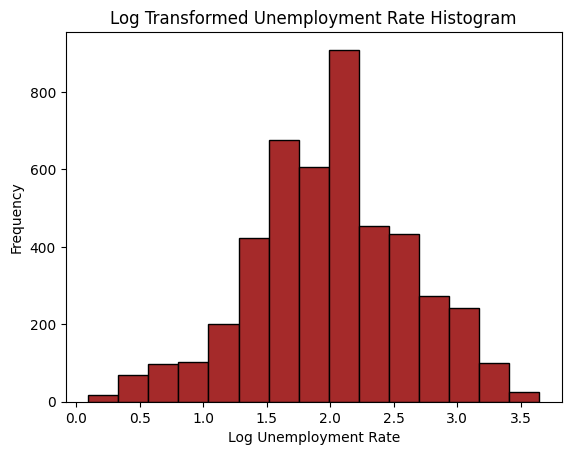

In [783]:
# Apply log transformation
data_cleaned["Log Unemployment Rate"] = np.log1p(data_cleaned["Unemployment Rate (%)"])

plt.hist(data_cleaned["Log Unemployment Rate"], bins=15, color="brown", edgecolor="black")
plt.title("Log Transformed Unemployment Rate Histogram")
plt.xlabel("Log Unemployment Rate")
plt.ylabel("Frequency")
plt.show()

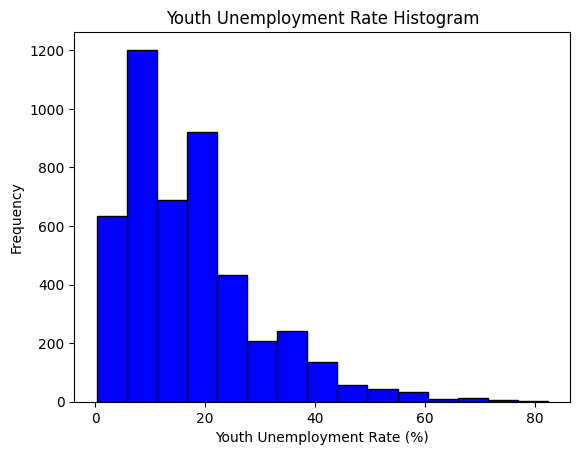

In [784]:
#Youth Unemployment Rate (%)
plt.hist(data_cleaned["Youth Unemployment Rate (%)"], bins=15, color="blue", edgecolor="black")
plt.title("Youth Unemployment Rate Histogram")
plt.xlabel("Youth Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

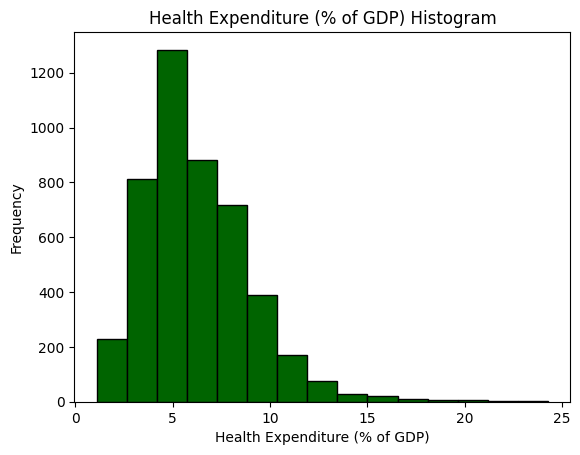

In [785]:
#Health Expenditure (% of GDP)
plt.hist(data_cleaned["Health Expenditure (% of GDP)"], bins=15, color="darkgreen", edgecolor="black")
plt.title("Health Expenditure (% of GDP) Histogram")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Frequency")

plt.show()

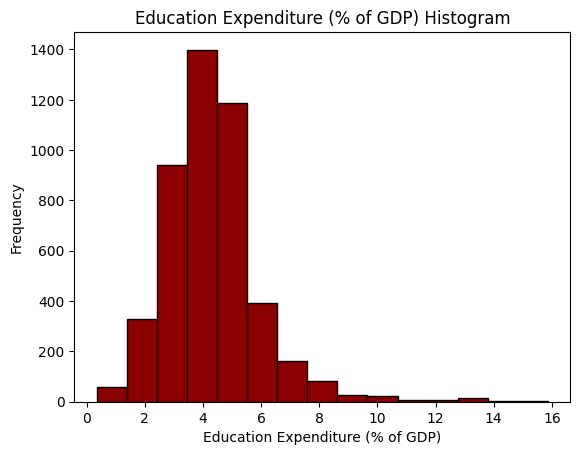

In [786]:
#Education Expenditure (% of GDP)
plt.hist(data_cleaned["Education Expenditure (% of GDP)"], bins=15, color="darkred", edgecolor="black")
plt.title("Education Expenditure (% of GDP) Histogram")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("Frequency")
plt.show()

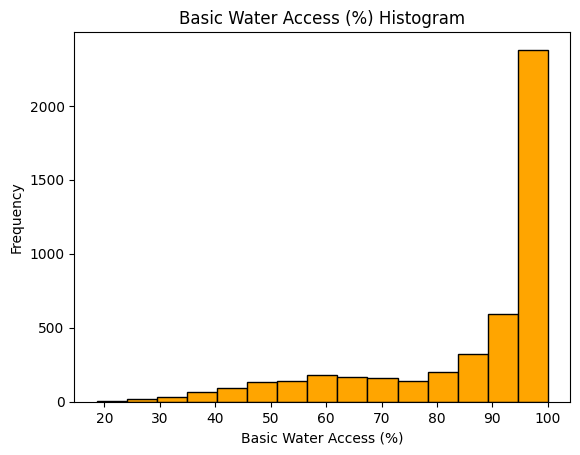

In [787]:
#Basic Water Access (%)
plt.hist(data_cleaned["Basic Water Access (%)"], bins=15, color="orange", edgecolor="black")
plt.title("Basic Water Access (%) Histogram")
plt.xlabel("Basic Water Access (%)")
plt.ylabel("Frequency")
plt.show()

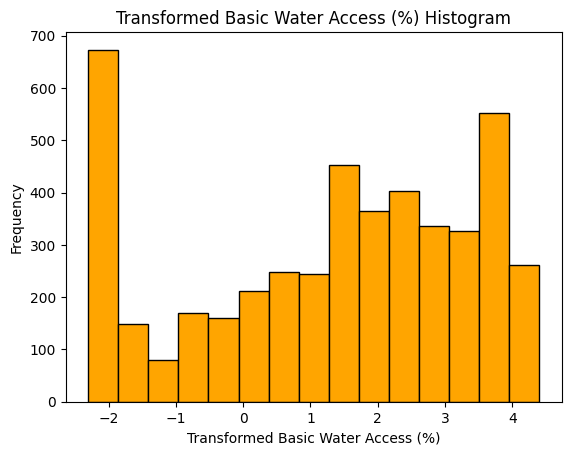

In [788]:
#Apply transformation

data_cleaned['inv_log_Water_Access'] = np.log(100.1 - data_cleaned['Basic Water Access (%)'])

#Plot
plt.hist(data_cleaned["inv_log_Water_Access"], bins=15, color="orange", edgecolor="black")
plt.title("Transformed Basic Water Access (%) Histogram")
plt.xlabel("Transformed Basic Water Access (%)")
plt.ylabel("Frequency")
plt.show()

## Bivariate EDA

Now, let's explore relationships between the most important variables

<ipython-input-789-3668a6c5ab06>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




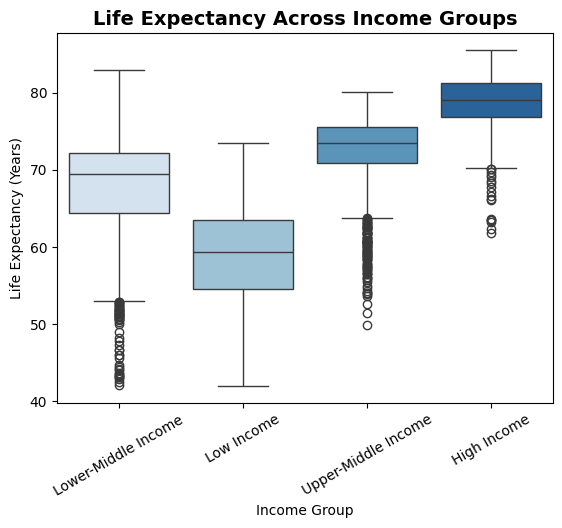

In [789]:
#Life Expectancy Across Income Groups
sns.boxplot(x=data_cleaned["Income Group"], y=data_cleaned["Life Expectancy (Years)"], palette="Blues")
plt.title("Life Expectancy Across Income Groups", fontsize=14, fontweight="bold")
plt.xlabel("Income Group")
plt.ylabel("Life Expectancy (Years)")
plt.xticks(rotation=30)

plt.show()

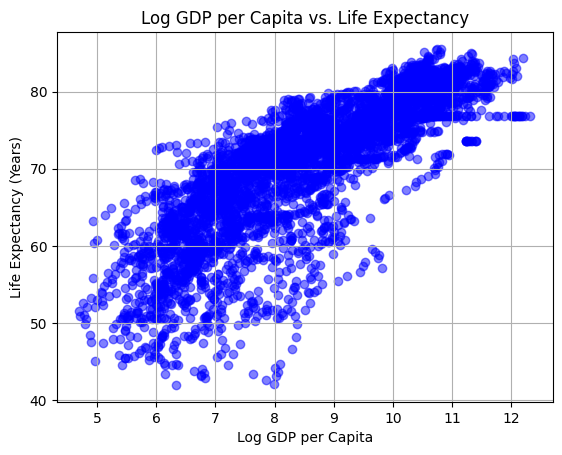

In [790]:
#Log GDP per Capita vs. Life Expectancy
plt.scatter(data_cleaned["Log GDP per Capita"], data_cleaned["Life Expectancy (Years)"], alpha=0.5, color="blue")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Life Expectancy (Years)")
plt.title("Log GDP per Capita vs. Life Expectancy")
plt.grid(True)
plt.show()

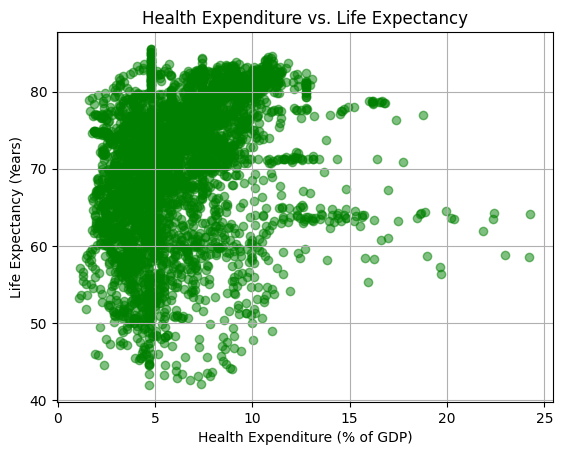

In [791]:
#Health Expenditure vs. Life Expectancy
plt.scatter(data_cleaned["Health Expenditure (% of GDP)"], data_cleaned["Life Expectancy (Years)"], alpha=0.5, color="green")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Health Expenditure vs. Life Expectancy")
plt.grid(True)
plt.show()

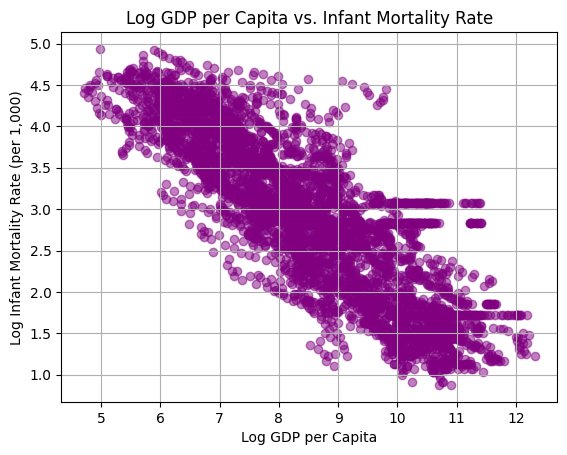

In [792]:
#Log GDP per Capita vs. Infant Mortality Rate
plt.scatter(data_cleaned["Log GDP per Capita"], data_cleaned["Log Infant Mortality Rate"], alpha=0.5, color="purple")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Log Infant Mortality Rate (per 1,000)")
plt.title("Log GDP per Capita vs. Infant Mortality Rate")
plt.grid(True)
plt.show()

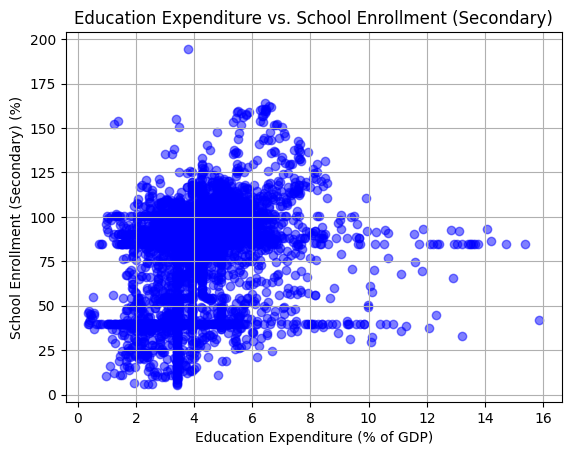

In [793]:
#Education Expenditure vs. School Enrollment (Secondary)
plt.scatter(data_cleaned["Education Expenditure (% of GDP)"], data_cleaned["Secondary School Enrollment (%)"], alpha=0.5, color="blue")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("School Enrollment (Secondary) (%)")
plt.title("Education Expenditure vs. School Enrollment (Secondary)")
plt.grid(True)
plt.show()

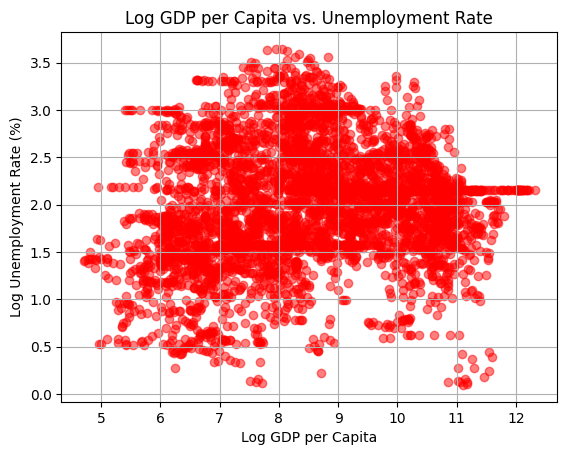

In [794]:
#Log GDP per Capita vs. Unemployment Rate
plt.scatter(data_cleaned["Log GDP per Capita"], data_cleaned["Log Unemployment Rate"], alpha=0.5, color="red")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Log Unemployment Rate (%)")
plt.title("Log GDP per Capita vs. Unemployment Rate")
plt.grid(True)
plt.show()

# **Model Building**

## Unsupervised Learning (Clustering) - kmeans method

First, we preapare the data

In [795]:
#Creating subset with variables of interest
cluster_data = data_cleaned[["Log GDP per Capita", 'Life Expectancy (Years)', 'inv_log_Water_Access']]

In [796]:
#Normalize variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cluster_data)
type(scaled_data)

numpy.ndarray

In [797]:
#Check scaled data
scaled_data

array([[0.06098026, 0.30615699, 0.98301639],
       [0.03069612, 0.31763128, 0.98295123],
       [0.06395027, 0.33268555, 0.97835892],
       ...,
       [0.35777771, 0.44371077, 0.88234595],
       [0.36134488, 0.43985541, 0.88406373],
       [0.36088692, 0.39691862, 0.88570348]])

Now, let's use the elbow method to determine the number of clusters

In [798]:
#import the KMeans from the sklearn.cluster submodule
from sklearn.cluster import KMeans

In [799]:
wcss = [] #Initialize an empty list to store the sum of Within - Cluster Squared Distances (WCSS) for different numbers of clusters.


for i in range(1,11): #for loop used to train KMeans with different numbers of clusters (from 1 to 10)

    kmeans = KMeans(n_clusters=i) ## Initializing the KMeans algorithm with 'i' clusters. Here, i changes from 1 to 10.

    kmeans.fit(scaled_data) #Training the model on the dataset 'scaled_data'

    wcss.append(kmeans.inertia_) # Adding the model's inertia to the list

In [800]:
#Check SSE
wcss

[832.0439634669607,
 312.6456859306125,
 159.17486645491434,
 122.81485123821706,
 101.89863825591658,
 90.02744070076793,
 79.86568002015959,
 73.92593210226137,
 68.44620055077792,
 64.75431270090438]

<Axes: >

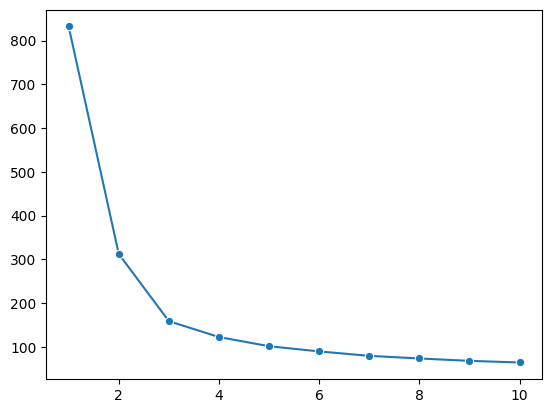

In [801]:
#plot the within-cluster squared error that we measured for each value of k that we tried.
sns.lineplot(x=range(1,11), y= wcss, marker='o')

We will use k = 4

Now, let's build the model

In [802]:
kmeans = KMeans(n_clusters=4)

In [803]:
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [804]:
#Identifying cluster assignment for each point
clusters = kmeans.predict(scaled_data)
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

Let's create a dataframe and add the clusters columns

In [805]:
#Creating data frame
columns = ["Log GDP per Capita", 'Life Expectancy (Years)', 'inv_log_Water_Access']
df_cluster_data = pd.DataFrame(scaled_data, columns=columns)

In [806]:
#Adding clusters
df_cluster_data['cluster_id'] = clusters

In [807]:
#Checking new data frame
df_cluster_data.head()

,Log GDP per Capita,Life Expectancy (Years),inv_log_Water_Access,cluster_id
0,0.060980,0.306157,0.983016,3
1,0.030696,0.317631,0.982951,3
2,0.063950,0.332686,0.978359,3
3,0.077739,0.353110,0.973622,3
4,0.091983,0.366879,0.968689,3


In [808]:
#Checking counts for each cluster
df_cluster_data['cluster_id'].value_counts()

,count
cluster_id,
2,1257
1,1197
3,1098
0,1079


In [809]:
#Finding centroids
centroids = kmeans.cluster_centers_
centroids

array([[0.75682819, 0.85630932, 0.07141264],
       [0.41232493, 0.63382269, 0.69219184],
       [0.59382736, 0.75008082, 0.47227092],
       [0.25513282, 0.36698805, 0.89207644]])

Let's visualize the clusters

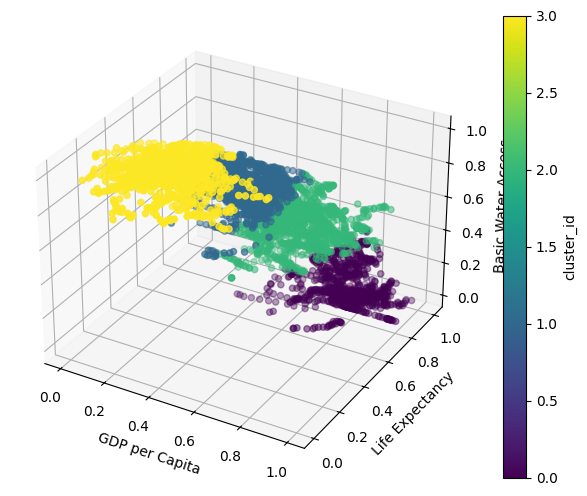

In [810]:
#Static plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
scatter = ax.scatter(
    df_cluster_data['Log GDP per Capita'],
    df_cluster_data['Life Expectancy (Years)'],
    df_cluster_data['inv_log_Water_Access'],
    c=df_cluster_data['cluster_id'],
    cmap='viridis')

# Plotting cluster centroids (assuming centroids array has shape [n_clusters, 3])
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    color='red',
    marker='x',
    s=100)

# Set axis labels
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Life Expectancy')
ax.set_zlabel('Basic Water Access')

# Color bar
fig.colorbar(scatter, ax=ax, label='cluster_id')

plt.show()

In [811]:
#Dinamic 3D plot for all variables:
import plotly.express as px

#DataFrame for centroids
centroids_df = pd.DataFrame(centroids, columns=["Log GDP per Capita", 'Life Expectancy (Years)', 'inv_log_Water_Access'])
centroids_df['cluster_id'] = ['Centroid'] * len(centroids_df)

#PointType label
df_cluster_data['PointType'] = 'Data Point'
centroids_df['PointType'] = 'Centroid'

# Match column name used for coloring
plot_df = pd.concat([df_cluster_data, centroids_df], ignore_index=True)

#Interactive 3D scatter plot
fig = px.scatter_3d(
    plot_df,
    x='Log GDP per Capita',
    y='Life Expectancy (Years)',
    z='inv_log_Water_Access',
    color='cluster_id',
    symbol='PointType',
    opacity=0.7,
    template='plotly',
    title='3D Cluster Visualization with Centroids')

fig.update_traces(marker=dict(size=5))
fig.show()

In [812]:
#Exporting plot
fig.write_html("/content/drive/MyDrive/UC3M/ESTADÍSTICA_Y_EMPRESA/4 - GVSU/Winter/CIS 331//3d_plot.html")

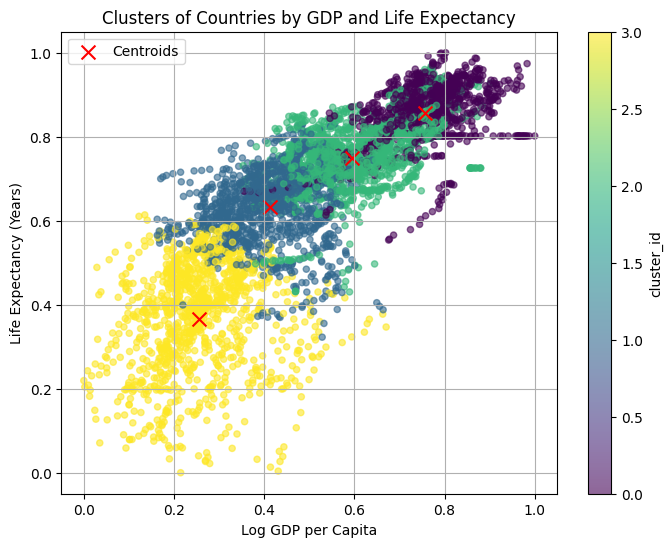

In [813]:
#Gdp x Life expectancy plot
# GDP vs Life Expectancy plot
df_cluster_data.plot.scatter(
    x='Log GDP per Capita',
    y='Life Expectancy (Years)',
    c='cluster_id',
    colormap='viridis',
    alpha=0.6,
    figsize=(8, 6)
)

# Plot cluster centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    color='red',
    marker='x',
    s=100,  # size of the centroid marker
    label='Centroids'
)

plt.title("Clusters of Countries by GDP and Life Expectancy")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Life Expectancy (Years)")
plt.legend()
plt.grid(True)
plt.show()


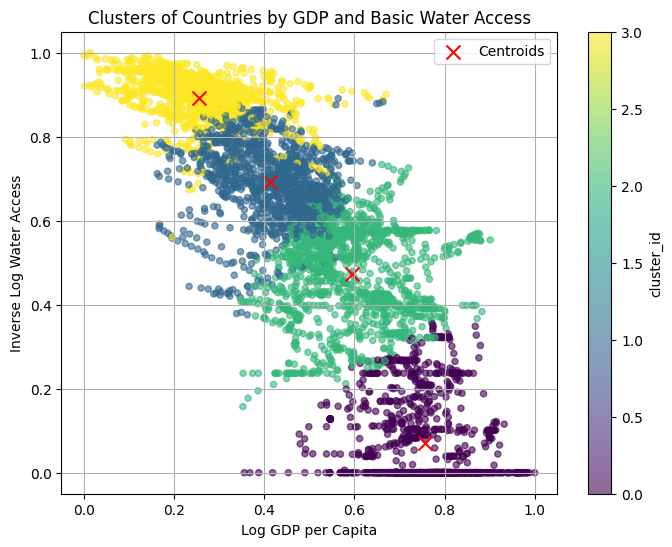

In [814]:
# GDP vs Water Access
df_cluster_data.plot.scatter(
    x='Log GDP per Capita',
    y='inv_log_Water_Access',
    c='cluster_id',
    colormap='viridis',
    alpha=0.6,
    figsize=(8, 6)
)

# Plot cluster centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 2],  # z-axis (water access)
    color='red',
    marker='x',
    s=100,
    label='Centroids'
)

plt.title("Clusters of Countries by GDP and Basic Water Access")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Inverse Log Water Access")
plt.legend()
plt.grid(True)
plt.show()


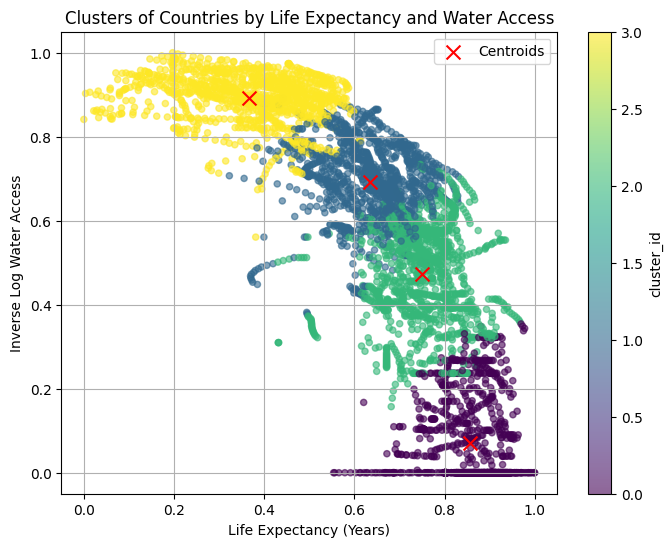

In [815]:
# Life Expectancy vs Water Access
df_cluster_data.plot.scatter(
    x='Life Expectancy (Years)',
    y='inv_log_Water_Access',
    c='cluster_id',
    colormap='viridis',
    alpha=0.6,
    figsize=(8, 6)
)

# Plot centroids
plt.scatter(
    centroids[:, 1],
    centroids[:, 2],
    color='red',
    marker='x',
    s=100,
    label='Centroids'
)

plt.title("Clusters of Countries by Life Expectancy and Water Access")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Inverse Log Water Access")
plt.legend()
plt.grid(True)
plt.show()


### Model Evaluation

In [816]:
# WCSS for the final model (k=4)
wcss_final = kmeans.inertia_
print(f"Final WCSS (k=4): {wcss_final:.2f}")

Final WCSS (k=4): 122.81


In [817]:
from sklearn.metrics import silhouette_score

# Assuming you already have a trained KMeans model:
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.406


## Supervised Learning - Regression

#### Preprocessing

In [818]:
# Recalculate correlation matrix with existing columns
corr_matrix2 = data_cleaned.corr(numeric_only=True)

# Correlation with Life Expectancy
correlations = corr_matrix2[['Life Expectancy (Years)']]
correlations

,Life Expectancy (Years)
Year,0.193452
Health Expenditure (% of GDP),0.270009
Exports (% of GDP),0.325761
GDP Growth (%),-0.131739
GDP per Capita (US$),0.549657
GNI per Capita (US$),0.592143
Education Expenditure (% of GDP),0.210023
Life Expectancy (Years),1.000000
"Infant Mortality Rate (per 1,000)",-0.904048
Basic Water Access (%),0.820963


In [819]:
#Absolute value
abs_target_corr = abs(correlations)
abs_target_corr

,Life Expectancy (Years)
Year,0.193452
Health Expenditure (% of GDP),0.270009
Exports (% of GDP),0.325761
GDP Growth (%),0.131739
GDP per Capita (US$),0.549657
GNI per Capita (US$),0.592143
Education Expenditure (% of GDP),0.210023
Life Expectancy (Years),1.000000
"Infant Mortality Rate (per 1,000)",0.904048
Basic Water Access (%),0.820963


In [820]:
#Apply threshold of 0.2
threshold = 0.2

condition = abs_target_corr['Life Expectancy (Years)'] >= threshold
condition

,Life Expectancy (Years)
Year,False
Health Expenditure (% of GDP),True
Exports (% of GDP),True
GDP Growth (%),False
GDP per Capita (US$),True
GNI per Capita (US$),True
Education Expenditure (% of GDP),True
Life Expectancy (Years),True
"Infant Mortality Rate (per 1,000)",True
Basic Water Access (%),True


In [821]:
#Final variables
selected_features = abs_target_corr[condition]
selected_features

,Life Expectancy (Years)
Health Expenditure (% of GDP),0.270009
Exports (% of GDP),0.325761
GDP per Capita (US$),0.549657
GNI per Capita (US$),0.592143
Education Expenditure (% of GDP),0.210023
Life Expectancy (Years),1.000000
"Infant Mortality Rate (per 1,000)",0.904048
Basic Water Access (%),0.820963
Secondary School Enrollment (%),0.791376
Log GDP per Capita,0.814045


In [822]:
#Type
type(selected_features)

pandas.core.frame.DataFrame

In [823]:
#Get list
final_features = selected_features.index.tolist()
final_features

['Health Expenditure (% of GDP)',
 'Exports (% of GDP)',
 'GDP per Capita (US$)',
 'GNI per Capita (US$)',
 'Education Expenditure (% of GDP)',
 'Life Expectancy (Years)',
 'Infant Mortality Rate (per 1,000)',
 'Basic Water Access (%)',
 'Secondary School Enrollment (%)',
 'Log GDP per Capita',
 'Log Infant Mortality Rate',
 'inv_log_Water_Access']

In [824]:
#Remove other variables
final_features.remove('GDP per Capita (US$)')
final_features.remove('Basic Water Access (%)')
final_features.remove("Infant Mortality Rate (per 1,000)")


In [825]:
#Creating subset
df_subset = data_cleaned[final_features]

In [826]:
df_subset.head()

,Health Expenditure (% of GDP),Exports (% of GDP),GNI per Capita (US$),Education Expenditure (% of GDP),Life Expectancy (Years),Secondary School Enrollment (%),Log GDP per Capita,Log Infant Mortality Rate,inv_log_Water_Access
0,3.815000,17.859125,1145.0,3.485837,55.298,54.49485,5.170092,4.532599,4.285765
1,3.815000,17.859125,1145.0,3.485837,55.798,14.47151,4.939546,4.503137,4.285329
2,9.443391,17.859125,180.0,3.485837,56.454,54.49485,5.192702,4.472781,4.254550
3,8.941258,17.859125,190.0,3.485837,57.344,14.07805,5.297673,4.439116,4.222802
4,9.808474,17.859125,210.0,3.485837,57.944,19.26314,5.406111,4.405499,4.189739


### Splitting the data

In [827]:
#Splitting into predictor matrix and target vector
X = df_subset.drop('Life Expectancy (Years)', axis=1)
y = df_subset['Life Expectancy (Years)']

In [828]:
from sklearn.model_selection import train_test_split

In [829]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [830]:
#Checking splits
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (3704, 8)
Shape of X_test: (927, 8)
Shape of y_train: (3704,)
Shape of y_test: (927,)


### Model Building

In [831]:
from sklearn.linear_model import LinearRegression

In [832]:
linreg_model = LinearRegression()

In [833]:
linreg_model.fit(X_train, y_train)

LinearRegression()

### Predicting Class Labels

In [834]:
#Predictions on train data
y_pred_train = linreg_model.predict(X_train)
y_pred_train

array([74.22234604, 62.54276404, 68.65815242, ..., 59.04425791,
       54.07867638, 77.0996284 ])

In [835]:
#Predictions on test data
y_pred_test = linreg_model.predict(X_test)

### Model Evaluation

In [836]:
from sklearn.metrics import mean_squared_error, r2_score

In [837]:
# RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# R-squared (R²)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Display the results
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
print(f"Training R²: {r2_train:.2f}")
print(f"Testing R²: {r2_test:.2f}")


Training RMSE: 3.82
Testing RMSE: 3.68
Training R²: 0.81
Testing R²: 0.83


## Supervised Learning - Classification - Decision Tree



### Preprocessing

In [838]:
# Encode the categorical target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cleaned['Income Group Encoded'] = le.fit_transform(data_cleaned['Income Group'])

In [839]:
# Select predictor features
features = [
    'Log GDP per Capita',
    'Health Expenditure (% of GDP)',
    'Education Expenditure (% of GDP)',
    'Basic Water Access (%)',
    'Secondary School Enrollment (%)']

### Splitting data

In [840]:
#Create X matrix and y vector
X = data_cleaned[features]
y = data_cleaned['Income Group Encoded']

In [841]:
#Split into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [842]:
print('Shape of X_train (predictor attributes in the training data):', X_train.shape)
print('Shape of y_train (target attribute in the training data):', y_train.shape)
print('Shape of X_test (predictor attributes in the test data):', X_test.shape)
print('Shape of y_test (target attribute in the test data):', y_test.shape)

Shape of X_train (predictor attributes in the training data): (3704, 5)
Shape of y_train (target attribute in the training data): (3704,)
Shape of X_test (predictor attributes in the test data): (927, 5)
Shape of y_test (target attribute in the test data): (927,)


### Model Building

In [843]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [844]:
#use criterion parameter to specify entropy as a measure to calculate impurity
model = DecisionTreeClassifier(criterion='entropy')

In [845]:
#Build Model
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

### Predicting Class Labels

In [846]:
#Train set
y_pred_train = model.predict(X_train)

In [847]:
#Test set
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 2, 0, 2, 3, 3, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 3,
       0, 0, 2, 0, 2, 2, 3, 3, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 3,
       2, 1, 1, 1, 0, 1, 3, 2, 2, 3, 3, 0, 0, 0, 3, 1, 0, 2, 3, 1, 0, 0,
       2, 0, 0, 3, 2, 1, 1, 0, 3, 3, 3, 3, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1,
       2, 0, 2, 2, 3, 2, 0, 0, 0, 3, 1, 3, 0, 3, 0, 2, 0, 3, 1, 0, 0, 3,
       1, 1, 2, 0, 1, 3, 3, 1, 2, 0, 1, 0, 0, 0, 0, 2, 3, 2, 2, 1, 2, 3,
       0, 2, 2, 0, 2, 2, 1, 3, 3, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 3, 2, 0,
       2, 3, 0, 3, 2, 2, 2, 1, 0, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 0, 0,
       2, 0, 0, 0, 3, 1, 1, 3, 2, 2, 1, 0, 3, 0, 0, 2, 2, 0, 2, 2, 2, 1,
       0, 1, 1, 2, 2, 2, 3, 0, 2, 2, 2, 0, 3, 0, 0, 1, 0, 1, 2, 2, 3, 2,
       0, 0, 2, 0, 0, 3, 1, 3, 1, 0, 3, 0, 3, 3, 3, 0, 1, 0, 3, 0, 2, 1,
       1, 2, 0, 3, 2, 3, 1, 2, 0, 3, 2, 0, 3, 0, 2, 0, 3, 3, 2, 3, 2, 1,
       3, 0, 2, 2, 1, 3, 2, 3, 3, 1, 0, 0, 0, 2, 0, 3, 0, 2, 3, 1, 1, 1,
       1, 0, 0, 2, 3, 3, 1, 2, 1, 3, 2, 1, 1, 0, 0,

### Model Evaluation

In [848]:
#Accuracy
from sklearn.metrics import accuracy_score
#On training set:
acc_train = accuracy_score(y_train, y_pred_train)
print('Accuracy of the Decision Tree model on training dataset: ',acc_train)
#On testing set:
acc_test = accuracy_score(y_test, y_pred_test)
print('Accuracy of the Decision Tree model on testing dataset: ',acc_test)

Accuracy of the Decision Tree model on training dataset:  1.0
Accuracy of the Decision Tree model on testing dataset:  0.9374325782092773


In [849]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat

array([[270,   0,   1,   4],
       [  0, 170,   9,   1],
       [  0,  12, 248,  13],
       [  7,   0,  11, 181]])

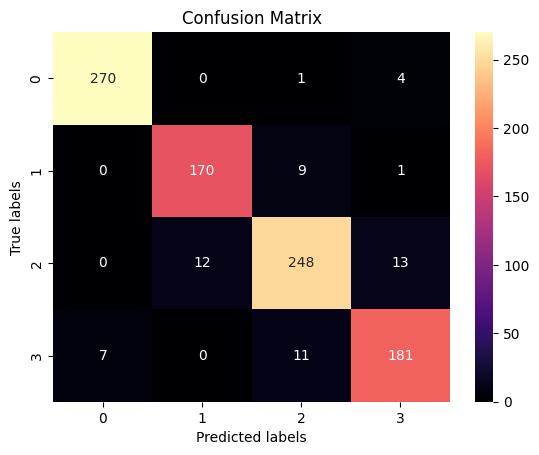

In [850]:
#Heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='magma') #heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [851]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       275
           1       0.93      0.94      0.94       180
           2       0.92      0.91      0.92       273
           3       0.91      0.91      0.91       199

    accuracy                           0.94       927
   macro avg       0.94      0.94      0.94       927
weighted avg       0.94      0.94      0.94       927



In [852]:
#K fold cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    estimator = DecisionTreeClassifier(criterion='entropy'), #classifier model
    X = X, # predictor attributes
    y = y, # target attributes
    cv = 6, #cv: Determines the cross-validation splitting strategy.
    scoring = "accuracy") #precision_macro

print('Accuracy Scores for each fold are:', score)
print('Average Accuracy score:', score.mean())

Accuracy Scores for each fold are: [0.92227979 0.85233161 0.92098446 0.86787565 0.90673575 0.87418936]
Average Accuracy score: 0.8907327697246247


## Supervised Learning - Classification - KNN

### Preprocessing

In [853]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building Model

In [854]:
#Let's build the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [855]:
#Now let's train it
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting Class Labels

In [856]:
#Let's first predict class labels for the train set
y_pred_train_knn = knn.predict(X_train_scaled)

In [857]:
#Now let's predict class labels for the test set
y_pred_test_knn = knn.predict(X_test_scaled)

### Model Evaluation

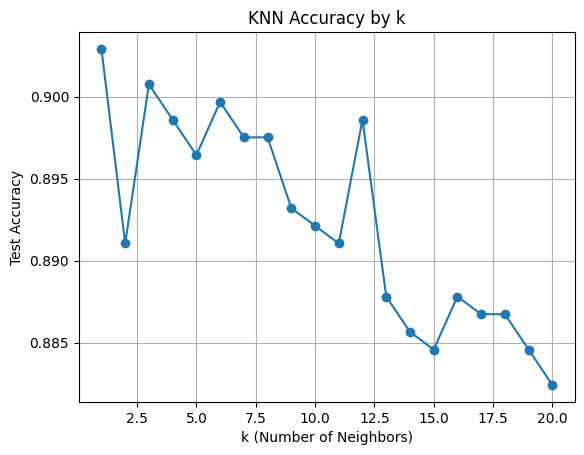

In [858]:
#Checking for the best k value
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)

# Plot
plt.plot(k_range, scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.title('KNN Accuracy by k')
plt.grid(True)
plt.show()


In [859]:
#Accuracy
from sklearn.metrics import accuracy_score
#On training set:
acc_train_knn = accuracy_score(y_train, y_pred_train_knn)
print('Accuracy of the KNN model on training dataset: ',acc_train_knn)
#On testing set:
acc_test_knn = accuracy_score(y_test, y_pred_test_knn)
print('Accuracy of the KNN model on testing dataset: ',acc_test_knn)

Accuracy of the KNN model on training dataset:  0.9557235421166307
Accuracy of the KNN model on testing dataset:  0.9007551240560949


In [860]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_mat_knn = confusion_matrix(y_test, y_pred_test_knn)
conf_mat_knn


array([[263,   0,   4,   8],
       [  0, 164,  16,   0],
       [  2,  17, 230,  24],
       [  7,   0,  14, 178]])

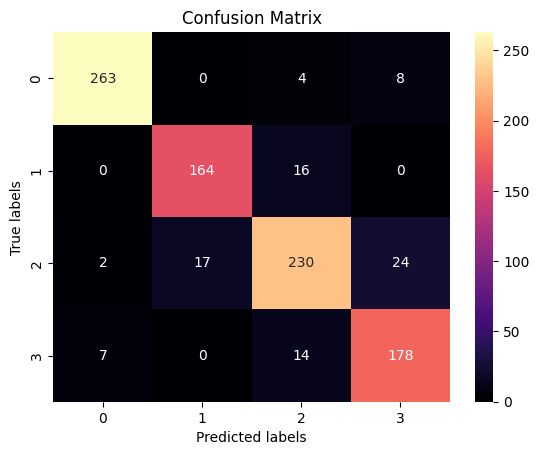

In [861]:
#Heatmap
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='magma') #heatmap
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [862]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       275
           1       0.91      0.91      0.91       180
           2       0.87      0.84      0.86       273
           3       0.85      0.89      0.87       199

    accuracy                           0.90       927
   macro avg       0.90      0.90      0.90       927
weighted avg       0.90      0.90      0.90       927



In [863]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create the pipeline (scaling + KNN)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# 5-fold cross-validation
scores_knn = cross_val_score(knn_pipeline, X, y, cv=6, scoring='accuracy')
print(scores_knn)
print(f"Mean Accuracy: {scores_knn.mean():.3f}")

[0.84067358 0.80958549 0.80699482 0.80829016 0.80440415 0.78858625]
Mean Accuracy: 0.810
